In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


---------------------------------Step 1: Load the Training Data and explore it---------------------------------

In [2]:
training=pd.read_csv('C:/Users/voran/Desktop/takehome/takehome/training.tsv',dtype=None, sep='\t',header=None,
                     names=['user_id','Activity_Date','Activity'])


In [3]:
training.describe()

,user_id,Activity_Date,Activity
count,4918677,4918677,4918677
unique,341568,671,7
top,2cd311cc3ef2d0c,2014-06-18,EmailOpen
freq,2718,50184,3191732


In [4]:
training.Activity.unique()

array(['EmailOpen', 'FormSubmit', 'Purchase', 'EmailClickthrough',
       'CustomerSupport', 'PageView', 'WebVisit'], dtype=object)

In [5]:
print training.Activity_Date.min()
print training.Activity_Date.max()

2013-07-01
2015-05-02


In [6]:
#Pivot the training Data using Activity as columnn

In [7]:
training['dummy']=1
pivoted_training=pd.pivot_table(training,index=['user_id','Activity_Date'],aggfunc=np.sum,fill_value=0,columns='Activity',values='dummy')


In [8]:
pivoted_training.reset_index(inplace=True)
pivoted_training.head()

Activity,user_id,Activity_Date,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
0,00002acbe042d69,2013-07-11,0,0,1,1,0,0,0
1,00002acbe042d69,2013-07-15,0,0,1,0,0,0,0
2,00002acbe042d69,2013-07-17,0,0,1,0,0,0,0
3,00002acbe042d69,2013-07-18,0,0,1,0,0,0,0
4,00002acbe042d69,2013-07-25,0,0,1,0,0,0,0


---------------------------------Step 2: Load the Test Data and explore it---------------------------------

In [9]:
testing=pd.read_csv('C:/Users/voran/Desktop/takehome/takehome/test.tsv',dtype=None, sep='\t',header=None,
                     names=['user_id','Activity_Date','Activity'])

In [10]:
testing.describe()

,user_id,Activity_Date,Activity
count,797759,797759,797759
unique,132810,92,5
top,2cd311cc3ef2d0c,2015-06-23,EmailOpen
freq,355,45919,550886


In [11]:
testing.Activity.unique()

array(['EmailOpen', 'EmailClickthrough', 'FormSubmit', 'PageView',
       'WebVisit'], dtype=object)

In [12]:
print testing.Activity_Date.min()
print testing.Activity_Date.max()

2015-05-01
2015-07-31


In [13]:
#Pivot the Test Data using Activity as column

In [14]:
testing['dummy']=1
pivoted_testing=pd.pivot_table(testing,index=['user_id','Activity_Date'],aggfunc=np.sum,fill_value=0,columns='Activity',values='dummy')


In [15]:
pivoted_testing.reset_index(inplace=True)
pivoted_testing.head()

Activity,user_id,Activity_Date,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit
0,0000ecf58c94668,2015-05-20,0,1,0,0,0
1,0000ecf58c94668,2015-06-11,0,1,0,0,0
2,0000ecf58c94668,2015-06-29,0,1,0,0,0
3,0000ecf58c94668,2015-07-05,0,1,0,0,0
4,0000ecf58c94668,2015-07-29,0,1,0,0,0


---------------------------------Step 3: Exploring the training dataset further---------------------------------

In [16]:
pivoted_training[pivoted_training['EmailOpen']==1].describe()

Activity,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
count,3.191732e+06,3.191732e+06,3191732.0,3.191732e+06,3.191732e+06,3.191732e+06,3.191732e+06
mean,6.382115e-04,7.417289e-02,1.0,3.502612e-02,4.557557e-02,1.197657e-02,4.573630e-02
std,2.525479e-02,2.620521e-01,0.0,1.838459e-01,2.085628e-01,1.087802e-01,2.089127e-01
min,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
#Exploring the users with one or more purchase

In [18]:
purchasers=pd.pivot_table(pivoted_training,values='Purchase',index='user_id',aggfunc=np.sum)

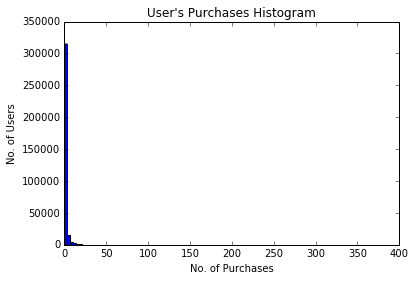

No. of Unique Users: 341568
No purchasers: 237577
One Time Purchasers: 49635
Greater than 10 Purchasers: 7787


In [19]:
purchasers.head()
plt.hist(purchasers,bins=100)
plt.title("User's Purchases Histogram")
plt.xlabel("No. of Purchases")
plt.ylabel('No. of Users')
plt.show()
print 'No. of Unique Users:', purchasers.count()
print 'No purchasers:' ,purchasers[purchasers==0].count()
print 'One Time Purchasers:', purchasers[purchasers==1].count()
print 'Greater than 10 Purchasers:', purchasers[purchasers>=10].count()
onetimepurchasers_users=purchasers[purchasers==1].index

In [20]:
#Exploring the one time purchasers taking in to account their first and last date of Activity

In [21]:
onetimepurchase=pivoted_training.loc[pivoted_training.user_id.isin(onetimepurchasers_users)]
activity_diff=onetimepurchase.pivot_table(aggfunc=[np.min,np.max],index='user_id',values='Activity_Date')
activity_diff.reset_index(inplace=True)
activity_diff['amax']=pd.to_datetime(activity_diff['amax'])
activity_diff['amin']=pd.to_datetime(activity_diff['amin'])
activity_diff['difference']=(activity_diff['amax']-activity_diff['amin'])
activity_diff['difference']=(activity_diff['difference'] / np.timedelta64(1, 'D')).astype(float)

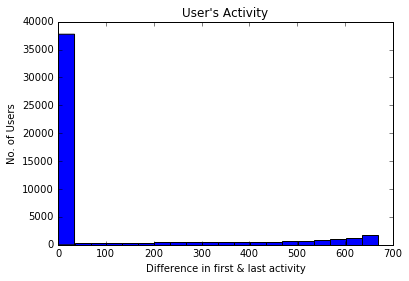

No. of Unique Users: 341568
No purchasers: 237577
One Time Purchasers: 49635
No. of Users within two day purchase: 18575
No. of Users with less than 10 days of activity: 37469


In [22]:
plt.hist(activity_diff['difference'],bins=20)
plt.title("User's Activity")
plt.xlabel("Difference in first & last activity")
plt.ylabel('No. of Users')
plt.show()
onedaybuyers=activity_diff[activity_diff['difference']==1].user_id
print 'No. of Unique Users:', purchasers.count()
print 'No purchasers:' ,purchasers[purchasers==0].count()
print 'One Time Purchasers:', activity_diff['user_id'].count()
print 'No. of Users within two day purchase:', onedaybuyers.count()
print 'No. of Users with less than 10 days of activity:' ,activity_diff[activity_diff['difference']<=10]['user_id'].count()

In [23]:
onedaybuyers_1=pivoted_training.loc[pivoted_training.user_id.isin(onedaybuyers)]
onedaybuyers_1[onedaybuyers_1['CustomerSupport']==1].describe()

Activity,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
count,18575.0,18575.000000,18575.000000,18575.000000,18575.000000,18575.0,18575.000000
mean,1.0,0.000054,0.000054,0.000054,0.000054,0.0,0.000054
std,0.0,0.007337,0.007337,0.007337,0.007337,0.0,0.007337
min,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [24]:
#Each purchase of users is followed by Customer Support on next day and thus removed those datapoints
#as they don't influence the purchase decision

In [25]:
pivoted_training[(pivoted_training['CustomerSupport']==1)].describe()
pivoted_training=pivoted_training[~(pivoted_training['CustomerSupport']==1)]

---------------------------------Step 4: Prepare Model Data---------------------------------

Each user's activities is transformed in to a row with activities as column variables and corresponding values are percentage of that activity 

If a user has total 100 Activities and 30 of them are EmailOpen then EmailOpen variable is 30% i.e. 0.3

If a user has one or more than one purchase, then the target variable is 1 else 0


In [26]:
training_model_data=pivoted_training.pivot_table(index='user_id',aggfunc=[np.sum,len],
                                                values=['CustomerSupport', 'EmailClickthrough',
                                 'EmailOpen', 'FormSubmit', 'PageView','Purchase', 'WebVisit'])

In [27]:
#Preparing Model Data
def prepare_data(data):
    transformed=pd.DataFrame()
    col=data.columns.values
    for i in range(len(col)):
        c=col[i][1]
        transformed[c]=(data['sum'][c]/data['len'][c]).reset_index(drop=True)
    ind=data.index.names
    x=data.reset_index()
    for i in range(len(ind)):
        each=ind[i]
        transformed[each]=x[each]
    return transformed


In [28]:
training_modeldata=prepare_data(training_model_data)
training_modeldata['target']=training_modeldata['Purchase']>0
training_modeldata['target']=training_modeldata['target'].astype('int64')
training_modeldata.head()

,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,user_id,target
0,0.0,0.000000,1.000000,0.111111,0.0,0.000000,0.0,00002acbe042d69,0
1,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0000a3a34bd07e6,0
2,0.0,0.055556,0.611111,0.055556,0.0,0.333333,0.0,0000ecf58c94668,1
3,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,00012205dd4613b,0
4,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,000198d39a568cf,1


---------------------------------Step 5: Model Generation & Evaulation---------------------------------

In [29]:
#Model Evaulation
def modeleval(X_train, X_test, Y_train, Y_test,model):
    #features=['EmailOpen','EmailClickthrough','PageView','WebVisit','FormSubmit']
    model=model.fit(X,Y)
    print "Score: ", model.score(X, Y)
    
    print '---------Training Data Results---------'
    print 
    predicted_train = model.predict(X_train)
    probs_train = model.predict_proba(X_train)
    print 'Accuracy: ', metrics.accuracy_score(Y_train, predicted_train)
    print 'AUC: ', metrics.roc_auc_score(Y_train, probs_train[:, 1])
    print 'Confusion Matrix: '
    print metrics.confusion_matrix(Y_train, predicted_train)
    print 'Classification Report: '
    print metrics.classification_report(Y_train, predicted_train)
    
    print '---------Testing Data Results---------'
    print 
    predicted_test = model.predict(X_test)
    probs_test = model.predict_proba(X_test)
    print 'Accuracy: ', metrics.accuracy_score(Y_test, predicted_test)
    print 'AUC: ', metrics.roc_auc_score(Y_test, probs_test[:, 1])
    print 'Confusion Matrix: '
    print metrics.confusion_matrix(Y_test, predicted_test)
    print 'Classification Report: '
    print metrics.classification_report(Y_test, predicted_test)
    return model

In [32]:
features=['EmailOpen','EmailClickthrough','PageView','WebVisit','FormSubmit']
X=training_modeldata[features]
Y=training_modeldata['target']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [34]:
#Logistic Regression 
model_logistic = LogisticRegression()
model_logistic=modeleval(X_train, X_test, Y_train, Y_test,model_logistic)

Score:  0.919348416714
---------Training Data Results---------

Accuracy:  0.919158333229
AUC:  0.934871336089
Confusion Matrix: 
[[163702   2645]
 [ 16684  56066]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.91      0.98      0.94    166347
          1       0.95      0.77      0.85     72750

avg / total       0.92      0.92      0.92    239097

---------Testing Data Results---------

Accuracy:  0.919791941135
AUC:  0.935869295175
Confusion Matrix: 
[[70046  1184]
 [ 7035 24206]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     71230
          1       0.95      0.77      0.85     31241

avg / total       0.92      0.92      0.92    102471



In [35]:
#Decision Tree
clf=tree.DecisionTreeClassifier(max_depth = 10, random_state = 1)
clf=modeleval(X_train, X_test, Y_train, Y_test,clf)
zip(features,list(clf.feature_importances_))

Score:  0.971952876148
---------Training Data Results---------

Accuracy:  0.972099189869
AUC:  0.996779719502
Confusion Matrix: 
[[164219   2128]
 [  4543  68207]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.97      0.99      0.98    166347
          1       0.97      0.94      0.95     72750

avg / total       0.97      0.97      0.97    239097

---------Testing Data Results---------

Accuracy:  0.971611480321
AUC:  0.996763501751
Confusion Matrix: 
[[70252   978]
 [ 1931 29310]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     71230
          1       0.97      0.94      0.95     31241

avg / total       0.97      0.97      0.97    102471



[('EmailOpen', 0.66046550226385514),
 ('EmailClickthrough', 0.089095247957362123),
 ('PageView', 0.012503659846034344),
 ('WebVisit', 0.014533846460784235),
 ('FormSubmit', 0.22340174347196412)]

In [36]:
#Random Forest
forest = RandomForestClassifier(max_depth = 10, random_state = 1)
forest=modeleval(X_train, X_test, Y_train, Y_test,forest)
zip(features,list(forest.feature_importances_))

Score:  0.974619987821
---------Training Data Results---------

Accuracy:  0.974959953492
AUC:  0.997003833228
Confusion Matrix: 
[[163738   2609]
 [  3378  69372]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.98      0.98    166347
          1       0.96      0.95      0.96     72750

avg / total       0.97      0.97      0.97    239097

---------Testing Data Results---------

Accuracy:  0.973826741224
AUC:  0.996975272413
Confusion Matrix: 
[[70024  1206]
 [ 1476 29765]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.98      0.98     71230
          1       0.96      0.95      0.96     31241

avg / total       0.97      0.97      0.97    102471



[('EmailOpen', 0.75554812467136268),
 ('EmailClickthrough', 0.076005089543798948),
 ('PageView', 0.015534331599574827),
 ('WebVisit', 0.024286124129528595),
 ('FormSubmit', 0.12862633005573493)]

In [37]:
#Naive Bayes Classifier
naivebayes = GaussianNB()
naivebayes=modeleval(X_train, X_test, Y_train, Y_test,naivebayes)

Score:  0.47478686528
---------Training Data Results---------

Accuracy:  0.47443506192
AUC:  0.891994857353
Confusion Matrix: 
[[ 48534 117813]
 [  7848  64902]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.29      0.44    166347
          1       0.36      0.89      0.51     72750

avg / total       0.71      0.47      0.46    239097

---------Testing Data Results---------

Accuracy:  0.47560773292
AUC:  0.893453488127
Confusion Matrix: 
[[20796 50434]
 [ 3301 27940]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.29      0.44     71230
          1       0.36      0.89      0.51     31241

avg / total       0.71      0.48      0.46    102471



Based on the Confusion Matrix and Accuracy Score, RandomForest gives the best results and thus we will use it to predict the potential buyers from test data

---------------------------------Step 6: Prepare the Test Data ---------------------------------

Prepare the test data on similar lines of training data i.e. getting percentages of each activity

In [38]:
testing_data=pivoted_testing.pivot_table(index='user_id',aggfunc=[np.sum,len],
                                                values=['EmailClickthrough',
 'EmailOpen', 'FormSubmit', 'PageView', 'WebVisit'])
testing_data=prepare_data(testing_data)
testing_data.head()


,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,user_id
0,0.0,1.0,0.0,0.0,0.0,0000ecf58c94668
1,1.0,1.0,0.0,0.0,0.0,000132f21724ee2
2,0.0,1.0,0.0,0.0,0.0,0001b315b991cf0
3,0.0,1.0,0.0,0.0,0.0,000269150971d08
4,0.0,1.0,0.0,0.0,0.0,000297ba4fa5026


---------------------------------Step 7: Potential users using RandomForest ---------------------------------

In [39]:
features=['EmailClickthrough','EmailOpen','FormSubmit','PageView','WebVisit']
test=testing_data[features]
predict_testing=forest.predict(test)
probs_testing = forest.predict_proba(test)
print predict_testing

[0 0 0 ..., 0 0 0]


In [40]:
predictions_forest=pd.DataFrame(data=[predict_testing,probs_testing[:,0],probs_testing[:,1]]).transpose()
predictions_forest.rename(columns={0: 'Prediction', 1: 'Prob_0',2:'Prob_1'}, inplace=True)
predictions_forest['user_id']=testing_data['user_id']
predictions_forest.head()

,Prediction,Prob_0,Prob_1,user_id
0,0.0,0.998723,0.001277,0000ecf58c94668
1,0.0,0.999567,0.000433,000132f21724ee2
2,0.0,0.998723,0.001277,0001b315b991cf0
3,0.0,0.998723,0.001277,000269150971d08
4,0.0,0.998723,0.001277,000297ba4fa5026


In [41]:
predictions=predictions_forest[predictions_forest['Prediction']==1.0].sort_values('Prob_1',ascending=False)

In [44]:
forest_predictions=predictions[['user_id','Prob_1','Prob_0']]
forest_predictions.to_csv('C:/Users/voran/Desktop/takehome/takehome/forest_predictions.csv',index=False)

---------------------------------Step 8: Segmenting User's Activities in different periods ---------------------------------

In [45]:
#TimePeriod.csv file contains mapping of Date to which period it belongs to

In [46]:
time_period=pd.read_csv('C:/Users/voran/Desktop/takehome/takehome/TimePeriod.csv',dtype=None)

In [47]:
time_period.Date=pd.to_datetime(time_period.Date)
time_period.Date=time_period.Date.astype('str')
pivoted_training.Activity_Date=pivoted_training.Activity_Date.astype('str')

In [48]:
dataset=pd.merge(pivoted_training, time_period, how='left', left_on=['Activity_Date'],right_on=['Date'])

In [49]:
dataset.head()

Activity,user_id,Activity_Date,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,Date,Period
0,00002acbe042d69,2013-07-11,0,0,1,1,0,0,0,2013-07-11,1
1,00002acbe042d69,2013-07-15,0,0,1,0,0,0,0,2013-07-15,1
2,00002acbe042d69,2013-07-17,0,0,1,0,0,0,0,2013-07-17,1
3,00002acbe042d69,2013-07-18,0,0,1,0,0,0,0,2013-07-18,1
4,00002acbe042d69,2013-07-25,0,0,1,0,0,0,0,2013-07-25,1


---------------------------------Step 9: Aggregated the data grouping by users and period---------------------------------

In [50]:
training_model_data_1=dataset.pivot_table(index=['user_id','Period'],aggfunc=[np.sum,len],
                                                values=['CustomerSupport', 'EmailClickthrough',
 'EmailOpen', 'FormSubmit', 'PageView','Purchase', 'WebVisit'])


In [51]:
training_perioddata=prepare_data(training_model_data_1)
training_perioddata['target']=training_perioddata['Purchase']>0
training_perioddata['target']=training_perioddata['target'].astype('int64')
training_perioddata.head()

,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,user_id,Period,target
0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,00002acbe042d69,1,0
1,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0000a3a34bd07e6,1,0
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0000a3a34bd07e6,2,0
3,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0000a3a34bd07e6,3,0
4,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0000a3a34bd07e6,4,0


---------------------------------Step 10: Running the model and evaulation---------------------------------

In [52]:
features=['EmailOpen','EmailClickthrough','PageView','WebVisit','FormSubmit']
X=training_perioddata[features]
Y=training_perioddata.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [53]:
clf_period=tree.DecisionTreeClassifier(max_depth = 10, random_state = 1)
clf_period=modeleval(X_train, X_test, Y_train, Y_test,clf_period)
zip(features,list(clf_period.feature_importances_))

Score:  0.977006881661
---------Training Data Results---------

Accuracy:  0.977227667013
AUC:  0.994371148889
Confusion Matrix: 
[[533153   5513]
 [ 10257 143584]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    538666
          1       0.96      0.93      0.95    153841

avg / total       0.98      0.98      0.98    692507

---------Testing Data Results---------

Accuracy:  0.976491716337
AUC:  0.993819781987
Confusion Matrix: 
[[228845   2364]
 [  4613  60967]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.99      0.98    231209
          1       0.96      0.93      0.95     65580

avg / total       0.98      0.98      0.98    296789



[('EmailOpen', 0.72508795566372086),
 ('EmailClickthrough', 0.070781333933987084),
 ('PageView', 0.011007041679746709),
 ('WebVisit', 0.058239661694371676),
 ('FormSubmit', 0.13488400702817369)]

In [54]:
forest_period=RandomForestClassifier(max_depth = 10, random_state = 1,min_samples_split=5)
forest_period=modeleval(X_train, X_test, Y_train, Y_test,clf_period)
zip(features,list(forest_period.feature_importances_))

Score:  0.977006881661
---------Training Data Results---------

Accuracy:  0.977227667013
AUC:  0.994371148889
Confusion Matrix: 
[[533153   5513]
 [ 10257 143584]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    538666
          1       0.96      0.93      0.95    153841

avg / total       0.98      0.98      0.98    692507

---------Testing Data Results---------

Accuracy:  0.976491716337
AUC:  0.993819781987
Confusion Matrix: 
[[228845   2364]
 [  4613  60967]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.99      0.98    231209
          1       0.96      0.93      0.95     65580

avg / total       0.98      0.98      0.98    296789



[('EmailOpen', 0.72508795566372086),
 ('EmailClickthrough', 0.070781333933987084),
 ('PageView', 0.011007041679746709),
 ('WebVisit', 0.058239661694371676),
 ('FormSubmit', 0.13488400702817369)]

-----------------------------Step 11: Potential users using RandomForest based on segmented data -----------------------------

In [55]:
predict_testing_period=forest_period.predict(test)
probs_testing_period = forest_period.predict_proba(test)
print predict_testing_period
predictions_forest=pd.DataFrame(data=[predict_testing_period,probs_testing_period[:,0],probs_testing_period[:,1]]).transpose()
predictions_forest.rename(columns={0: 'Prediction', 1: 'Prob_0',2:'Prob_1'}, inplace=True)
predictions_forest['user_id']=testing_data['user_id']
predictions_forest.head()

[0 0 0 ..., 0 0 0]


,Prediction,Prob_0,Prob_1,user_id
0,0.0,0.999132,0.000868,0000ecf58c94668
1,0.0,0.998659,0.001341,000132f21724ee2
2,0.0,0.999132,0.000868,0001b315b991cf0
3,0.0,0.999132,0.000868,000269150971d08
4,0.0,0.999132,0.000868,000297ba4fa5026


In [56]:
predictions_forest_exp=predictions_forest[predictions_forest['Prediction']==1.0].sort_values('Prob_1',ascending=False)
forest_predictions_period=predictions_forest_exp[['user_id','Prob_1','Prob_0']]
forest_predictions_period.to_csv('C:/Users/voran/Desktop/takehome/takehome/forest_predictions_period.csv',index=False)

Best Model: 'RandomForest'

Data Aggregating Techniques: PeriodWise

Activity Importances:

    'EmailOpen' : 0.72508795566372086

    'EmailClickthrough': 0.070781333933987084

    'PageView': 0.011007041679746709

    'WebVisit': 0.058239661694371676

    'FormSubmit': 0.13488400702817369